<a href="https://colab.research.google.com/github/salsabilar311/Movie-Recommendation-System/blob/main/Movie_Recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/salsabilar311/Movie-Recommendation-System/main/imdb_top_1000.csv')
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


**Data Understanding**
- Dataset yang dimiliki pada proyek ini memiliki 16 fitur
- Memiliki 1000 sampel
- Dataset memiliki 13 fitur bertipe object
- Dataset memiliki 2 fitur bertipe float64
- Dataset memiliki 1 fitur bertipe int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


**Univariate Exploratory Data Analysis**

In [ ]:
print('Jenis Certificate: ', df.Certificate.unique())
print('Jenis Genre: ', df.Genre.unique())

Jenis Certificate:  ['A' 'UA' 'U' 'PG-13' 'R' nan 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA'
 'Unrated' 'GP' 'Approved' 'TV-PG' 'U/A']
Jenis Genre:  ['Drama' 'Crime, Drama' 'Action, Crime, Drama' 'Action, Adventure, Drama'
 'Biography, Drama, History' 'Action, Adventure, Sci-Fi' 'Drama, Romance'
 'Western' 'Action, Sci-Fi' 'Biography, Crime, Drama'
 'Action, Adventure, Fantasy' 'Comedy, Drama, Thriller'
 'Adventure, Drama, Sci-Fi' 'Animation, Adventure, Family' 'Drama, War'
 'Crime, Drama, Fantasy' 'Comedy, Drama, Romance' 'Crime, Drama, Mystery'
 'Crime, Drama, Thriller' 'Action, Drama, Mystery'
 'Drama, Family, Fantasy' 'Drama, Music' 'Biography, Comedy, Drama'
 'Drama, Mystery, Sci-Fi' 'Biography, Drama, Music'
 'Crime, Mystery, Thriller' 'Animation, Adventure, Drama'
 'Animation, Drama, War' 'Adventure, Comedy, Sci-Fi'
 'Horror, Mystery, Thriller' 'Drama, Romance, War' 'Comedy, Drama, Family'
 'Animation, Drama, Fantasy' 'Action, Biography, Drama'
 'Animation, Action, Adventure' 'Drama

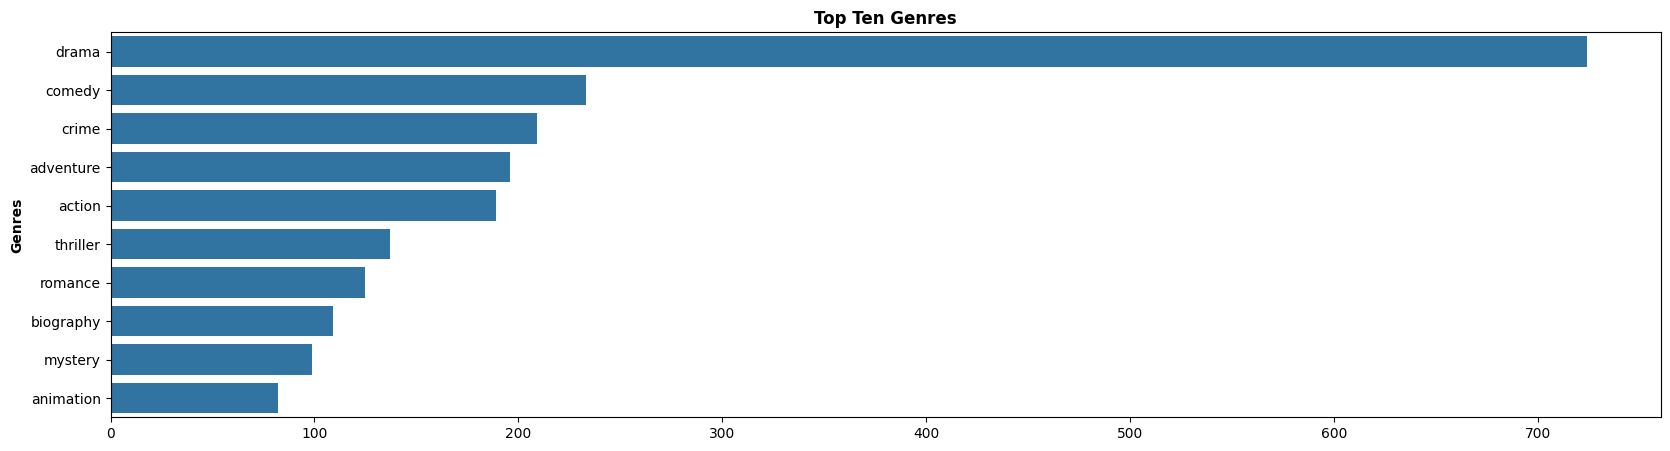

In [24]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

genre = []
for x in df['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count = Counter(genre)
count = count.most_common()[:10]
x, y = zip(*count)

fig, axs = plt.subplots(figsize=(20, 5))
g = sns.barplot(x=y, y=x)  # Mengubah posisi argumen x dan y di barplot
g.set_ylabel("Genres", weight="bold")
g.set_title("Top Ten Genres", weight="bold")
plt.show()


**Data Preparation**

**Remove Missing Value**

In [ ]:
df = df.dropna()

**Remove Duplicates**

In [ ]:
df = df.drop_duplicates()

**Delete unnecessary columns**

In [ ]:
df.drop(['Poster_Link','Overview', 'Gross', 'Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Certificate'], axis=1, inplace=True)

**Model Development dengan Content Based Filtering**

**One-hot Encoding**

In [ ]:
df_1 = df['Genre'].str.get_dummies(', ')

**Columns in df_1**

In [ ]:
df_1.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

**Change df_1 to array**

In [ ]:
tfidf_matrix = df_1.values
tfidf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

**Set index for df_1**

In [ ]:
df_1.index = df.Series_Title
df_1

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Series_Title,,,,,,,,,,,,,,,,,,,,,
The Shawshank Redemption,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Godfather,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Dark Knight,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Godfather: Part II,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 Angry Men,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Giù la testa,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Kelly's Heroes,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
The Jungle Book,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Calculate cosine similarity**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.70710678, 0.57735027, ..., 0.        , 0.        ,
        0.57735027],
       [0.70710678, 1.        , 0.81649658, ..., 0.        , 0.        ,
        0.40824829],
       [0.57735027, 0.81649658, 1.        , ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.57735027, 0.40824829, 0.33333333, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama film
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Series_Title'], columns=df['Series_Title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (714, 714)


Series_Title,The Conversation,What Ever Happened to Baby Jane?,The Dark Knight,What's Eating Gilbert Grape,"South Park: Bigger, Longer & Uncut"
Series_Title,,,,,
The Bourne Ultimatum,0.666667,0.333333,0.333333,0.000000,0.000000
Life of Pi,0.333333,0.333333,0.333333,0.577350,0.333333
Airplane!,0.000000,0.000000,0.000000,0.000000,0.577350
The Help,0.577350,0.577350,0.577350,1.000000,0.000000
Star Wars: Episode VII - The Force Awakens,0.000000,0.000000,0.333333,0.000000,0.000000
Taken,0.408248,0.408248,0.408248,0.000000,0.000000
The Innocents,0.000000,0.577350,0.000000,0.000000,0.000000
Drive,0.408248,0.408248,0.816497,0.707107,0.000000
Modern Times,0.333333,0.333333,0.333333,0.577350,0.333333


**Recommendation function**

In [ ]:
def movie_recommendations(nama_film, similarity_data=cosine_sim_df, items=df[['Series_Title', 'Genre']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_film].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_film agar nama film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_film, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
df[df.Series_Title.eq('Titanic')]

,Series_Title,Genre,IMDB_Rating,Director,Star1,Star2,Star3,Star4
652,Titanic,"Drama, Romance",7.8,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates


**Input Recomendations**

In [ ]:
film = str(input('Masukkan Film : '))
print()
movie_recommendations(film)

Masukkan Film : Titanic



,Series_Title,Genre
0,Call Me by Your Name,"Drama, Romance"
1,Fa yeung nin wah,"Drama, Romance"
2,The Bridges of Madison County,"Drama, Romance"
3,Before Midnight,"Drama, Romance"
4,Brokeback Mountain,"Drama, Romance"
